<a href="https://www.kaggle.com/code/expertjha001/notebookc86819dd6a?scriptVersionId=115394862" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## OVERVIEW
This EDA project ia about diabetes patients. Diabetes is a dangerous disease and is well spread all around the world. Most of the people currently living with diabetes are unaware of their disease, resulting in a higher risk of harmful and costly complications which causes cardiovascular disease, permanent blindness, kidney failure and of lower-limb amputation. Diabetes belongs to the top ten leading causes of death globally. There isn’t a cure yet for diabetes. Only disciplined lifestyle and strict diet can control the growth.


## Symtoms of Diabetes
 Symptoms may include frequent urination, excessive thirst or hunger, and weight changes.
## Main types of diabetes
##### Prediabetes
Blood sugar levels are higher than normal, but not high enough to be diagnosed as other diabetes. 
##### Type 1 Diabetes 
Body loses the ability to produce insulin, which is necessary to convert food into energy and regulate blood sugar levels. 
Currently no one knows how to prevent type 1 diabetic.
##### Type 2 Diabetes 
Type 2 diabetes involves high blood sugar levels and reduced responsiveness to insulin. This can lead to dangerous complications for your eyes, heart, and other organs.
##### Gestational Diabetes 
Gestational Diabetes develops during pregnancy, causing dangerously high blood sugar for both the mother & baby.  

### Risk factors associated with diabetes
- Type 1 
-- Family History : Having a parent, brother, or sister with type 1 diabetes
- Type 2
-- prediabetes and overweight
-- 45 years or older
-- someone in the family with type 2 diabetes
-- having weight more than 4 kg of a new born baby
- Gestational Diabetes
-- Gestational diabetes during a previous pregnancy.
-- Overweight and over than 25 years old.
-- Have a hormone disorder called polycystic ovary syndrome (PCOS).


## Project Objective
As mentioned above, in most of cases people are not awared about they are diabetic. Different types of diabetic have different approach of treatment. Although the given dataset doesnot include information about having other disorder or not , ethnicity which could have been better to explain its type.
Our dataset has 9 columns out of which one is target. Hence we need to explore the remaing 8 features
to get the best results.
So our aim is 
- Basic understanding and exploration about the diabetes dataset.
- Apply all the preprocessing methods to get a cleaned and useful dataset for ML 
- Finding some important features causing the diabetese.

#### Basic details about columns
    - Pregnancies : Number of times pregnant
    - Glucose : Plasma glucose concentration 2 hours in an oral glucose tolerance test
    - Blood Pressure : Diastolic blood pressure (mm Hg)
    - Skin Thickness : Triceps skin fold thickness (mm)
    - Insulin : 2-Hour serum insulin (mu U/ml)
    - BMI : Body mass index (weight in kg/(height in m)^2)
    - Diabetes Pedigree Function : Mellitus history in relatives and the genetic relationship of relatives to the patient.
    - Age: Age (years)
    - Outcome: Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic

In [1]:
#importing the necessary libraries

import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt
from scipy.stats import boxcox
import missingno as msno
import plotly.express as plx

### 1. Uploading the dataset

In [2]:
diabetes=pandas.read_excel('/kaggle/input/pimaindinasdiabetes-excel-data/pima-indians-diabetes.xlsx',names=['Pregnancies','Glucose','Blood Pressure','Skin Thickness',
                                                               'Insulin','BMI','Diabetes Pedigree Function','Age','Outcome'])
diabetes_data=diabetes.copy()
diabetes_data

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
1,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0
...,...,...,...,...,...,...,...,...,...
762,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
763,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
764,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
765,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


There are 768 observations and 9 variables.
It is clearly seen that Insulin and Skin Thickness column has some zero values. Which may be because of incorrect entry. 

In [3]:
# summary of the dataset
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 767 non-null    float64
 1   Glucose                     767 non-null    float64
 2   Blood Pressure              767 non-null    float64
 3   Skin Thickness              767 non-null    float64
 4   Insulin                     767 non-null    float64
 5   BMI                         767 non-null    float64
 6   Diabetes Pedigree Function  767 non-null    float64
 7   Age                         767 non-null    float64
 8   Outcome                     767 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


Although above function showing no null values but there are some zeros in the dataset which needs to replaced as Nan for    
better understanding

In [4]:
for columns in diabetes_data:
    if columns not in ['Pregnancies','Outcome']:
        print(f" {columns} has {(diabetes_data[columns]==0).sum()} zeros")

 Glucose has 5 zeros
 Blood Pressure has 35 zeros
 Skin Thickness has 227 zeros
 Insulin has 373 zeros
 BMI has 11 zeros
 Diabetes Pedigree Function has 0 zeros
 Age has 0 zeros


In [5]:
def mapp(x):
    """ 
    This function replaces the 0 with diabetic and 1 with non diabetic
    """
    return 'Non-Diabetic' if x == 0 else 'Diabetic'

In [6]:
# classifing the Outcome as diabetic and nonDiabetic
diabetes_data['Outcome'] = diabetes_data['Outcome'].map(mapp)
diabetes_data.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,Non-Diabetic
1,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,Diabetic
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,Non-Diabetic
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,Diabetic
4,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,Non-Diabetic


Columns shown above having zeros doesnot make any sense. Like a person with 0 BMI or 0 Insulin is not possible in any manner. Ideally We need to replace this with Nan.

In [7]:
# excluding Pregnancies and outcome column and replacing all other zero with nan
diabetes_data.iloc[:,~diabetes_data.columns.isin(['Pregnancies','Outcome'])]=diabetes_data.iloc[:,~diabetes_data.columns.isin(['Pregnancies'])].replace({0:numpy.nan}) #= diabetes_data.iloc[:,~diabetes_data.columns.isin(['Pregnancies'])].replace([0:numpy.nan],inplace=True)

In [8]:
diabetes_data

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31.0,Non-Diabetic
1,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32.0,Diabetic
2,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,Non-Diabetic
3,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,Diabetic
4,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30.0,Non-Diabetic
...,...,...,...,...,...,...,...,...,...
762,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,Non-Diabetic
763,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27.0,Non-Diabetic
764,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,Non-Diabetic
765,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47.0,Diabetic


As we can see zeros have been replaced with nan in all the columns except Pregnancies.  
Now we find the total null values in the dataset

In [9]:
diabetes_data.isnull().sum()

Pregnancies                     0
Glucose                         5
Blood Pressure                 35
Skin Thickness                227
Insulin                       373
BMI                            11
Diabetes Pedigree Function      0
Age                             0
Outcome                         0
dtype: int64

In [10]:
# checking for unusual data in features
diabetes_data['Pregnancies'].value_counts().sort_index().to_dict()

{0.0: 111,
 1.0: 135,
 2.0: 103,
 3.0: 75,
 4.0: 68,
 5.0: 57,
 6.0: 49,
 7.0: 45,
 8.0: 38,
 9.0: 28,
 10.0: 24,
 11.0: 11,
 12.0: 9,
 13.0: 10,
 14.0: 2,
 15.0: 1,
 17.0: 1}

Number of pregnancy (15 and 17) are quite high

In [11]:
print(diabetes_data['Glucose'].value_counts().sort_index().to_dict())

{44.0: 1, 56.0: 1, 57.0: 2, 61.0: 1, 62.0: 1, 65.0: 1, 67.0: 1, 68.0: 3, 71.0: 4, 72.0: 1, 73.0: 3, 74.0: 4, 75.0: 2, 76.0: 2, 77.0: 2, 78.0: 4, 79.0: 3, 80.0: 6, 81.0: 6, 82.0: 3, 83.0: 6, 84.0: 10, 85.0: 7, 86.0: 3, 87.0: 7, 88.0: 9, 89.0: 6, 90.0: 11, 91.0: 9, 92.0: 9, 93.0: 7, 94.0: 7, 95.0: 13, 96.0: 8, 97.0: 9, 98.0: 3, 99.0: 17, 100.0: 17, 101.0: 9, 102.0: 13, 103.0: 9, 104.0: 6, 105.0: 13, 106.0: 14, 107.0: 11, 108.0: 13, 109.0: 12, 110.0: 6, 111.0: 14, 112.0: 13, 113.0: 5, 114.0: 11, 115.0: 10, 116.0: 7, 117.0: 11, 118.0: 6, 119.0: 11, 120.0: 11, 121.0: 6, 122.0: 12, 123.0: 9, 124.0: 11, 125.0: 14, 126.0: 9, 127.0: 5, 128.0: 11, 129.0: 14, 130.0: 7, 131.0: 5, 132.0: 5, 133.0: 5, 134.0: 6, 135.0: 4, 136.0: 8, 137.0: 8, 138.0: 5, 139.0: 8, 140.0: 5, 141.0: 5, 142.0: 5, 143.0: 6, 144.0: 7, 145.0: 5, 146.0: 9, 147.0: 7, 148.0: 3, 149.0: 1, 150.0: 3, 151.0: 6, 152.0: 4, 153.0: 2, 154.0: 6, 155.0: 5, 156.0: 3, 157.0: 2, 158.0: 8, 159.0: 2, 160.0: 1, 161.0: 3, 162.0: 6, 163.0: 3, 164

In [12]:
print(diabetes_data['Blood Pressure'].value_counts().sort_index().to_dict())

{24.0: 1, 30.0: 2, 38.0: 1, 40.0: 1, 44.0: 4, 46.0: 2, 48.0: 5, 50.0: 13, 52.0: 11, 54.0: 11, 55.0: 2, 56.0: 12, 58.0: 21, 60.0: 37, 61.0: 1, 62.0: 34, 64.0: 43, 65.0: 7, 66.0: 30, 68.0: 45, 70.0: 57, 72.0: 43, 74.0: 52, 75.0: 8, 76.0: 39, 78.0: 45, 80.0: 40, 82.0: 30, 84.0: 23, 85.0: 6, 86.0: 21, 88.0: 25, 90.0: 22, 92.0: 8, 94.0: 6, 95.0: 1, 96.0: 4, 98.0: 3, 100.0: 3, 102.0: 1, 104.0: 2, 106.0: 3, 108.0: 2, 110.0: 3, 114.0: 1, 122.0: 1}


For healthy person Diastolic blood pressure (mm Hg) should range between 60-80 mm/hg.   
No unusual data found

In [13]:
print(diabetes_data['Skin Thickness'].value_counts().sort_index().to_dict())

{7.0: 2, 8.0: 2, 10.0: 5, 11.0: 6, 12.0: 7, 13.0: 11, 14.0: 6, 15.0: 14, 16.0: 6, 17.0: 14, 18.0: 20, 19.0: 18, 20.0: 13, 21.0: 10, 22.0: 16, 23.0: 22, 24.0: 12, 25.0: 16, 26.0: 16, 27.0: 23, 28.0: 20, 29.0: 17, 30.0: 27, 31.0: 19, 32.0: 31, 33.0: 20, 34.0: 8, 35.0: 14, 36.0: 14, 37.0: 16, 38.0: 7, 39.0: 18, 40.0: 16, 41.0: 15, 42.0: 11, 43.0: 6, 44.0: 5, 45.0: 6, 46.0: 8, 47.0: 4, 48.0: 4, 49.0: 3, 50.0: 3, 51.0: 1, 52.0: 2, 54.0: 2, 56.0: 1, 60.0: 1, 63.0: 1, 99.0: 1}


Skin thickness 99.0 seems to be an outlier

In [14]:
diabetes_data['BMI'].value_counts().sort_index()

18.2    3
18.4    1
19.1    1
19.3    1
19.4    1
       ..
53.2    1
55.0    1
57.3    1
59.4    1
67.1    1
Name: BMI, Length: 247, dtype: int64

In [15]:
diabetes_data['Insulin'].value_counts().sort_index()

14.0     1
15.0     1
16.0     1
18.0     2
22.0     1
        ..
579.0    1
600.0    1
680.0    1
744.0    1
846.0    1
Name: Insulin, Length: 185, dtype: int64

In [16]:
print(diabetes_data['Insulin'][diabetes_data['Insulin']>330].sort_index().to_dict())

{7: 543.0, 12: 846.0, 53: 342.0, 110: 495.0, 152: 485.0, 185: 495.0, 219: 478.0, 227: 744.0, 230: 370.0, 246: 680.0, 247: 402.0, 257: 375.0, 285: 545.0, 295: 360.0, 369: 465.0, 391: 415.0, 408: 579.0, 414: 474.0, 485: 480.0, 583: 600.0, 644: 440.0, 654: 540.0, 694: 480.0, 706: 335.0, 709: 387.0, 714: 392.0, 752: 510.0}


higher insulin in blood is hyperinsullinemia which is a sign of type-2 diabetic

In [17]:
diabetes_data['Diabetes Pedigree Function'].value_counts().sort_index()

0.078    1
0.084    1
0.085    2
0.088    2
0.089    1
        ..
1.893    1
2.137    1
2.288    1
2.329    1
2.420    1
Name: Diabetes Pedigree Function, Length: 516, dtype: int64

In [18]:
print(diabetes_data['Age'].value_counts().sort_index().to_dict())

{21.0: 63, 22.0: 72, 23.0: 38, 24.0: 46, 25.0: 48, 26.0: 33, 27.0: 32, 28.0: 35, 29.0: 29, 30.0: 21, 31.0: 24, 32.0: 16, 33.0: 17, 34.0: 14, 35.0: 10, 36.0: 16, 37.0: 19, 38.0: 16, 39.0: 12, 40.0: 13, 41.0: 22, 42.0: 18, 43.0: 13, 44.0: 8, 45.0: 15, 46.0: 13, 47.0: 6, 48.0: 5, 49.0: 5, 50.0: 7, 51.0: 8, 52.0: 8, 53.0: 5, 54.0: 6, 55.0: 4, 56.0: 3, 57.0: 5, 58.0: 7, 59.0: 3, 60.0: 5, 61.0: 2, 62.0: 4, 63.0: 4, 64.0: 1, 65.0: 3, 66.0: 4, 67.0: 3, 68.0: 1, 69.0: 2, 70.0: 1, 72.0: 1, 81.0: 1}


No unusual or incorrect found. Age varies frorm 21 to 81.

<AxesSubplot:>

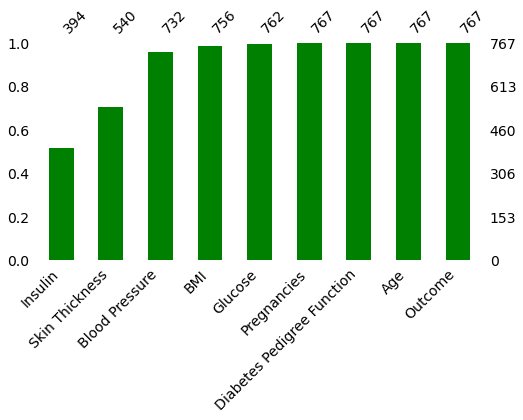

In [19]:
# Missingno is a very usefull library to visualise the null values

msno.bar(diabetes_data,figsize=(8,4),fontsize=14,color='Green',sort='ascending')

<AxesSubplot:>

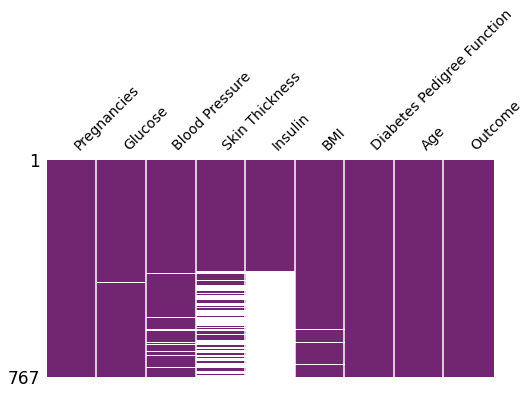

In [20]:
msno.matrix(diabetes_data.sort_values('Insulin'),figsize=(8,4),fontsize=14,color=(0.45, 0.15, 0.45),sparkline=False)

Skin thichness and insulin column has most missing values not at random.   
Rows in which Skin thickness having missing valuse also having missing data in Insulin 

<AxesSubplot:>

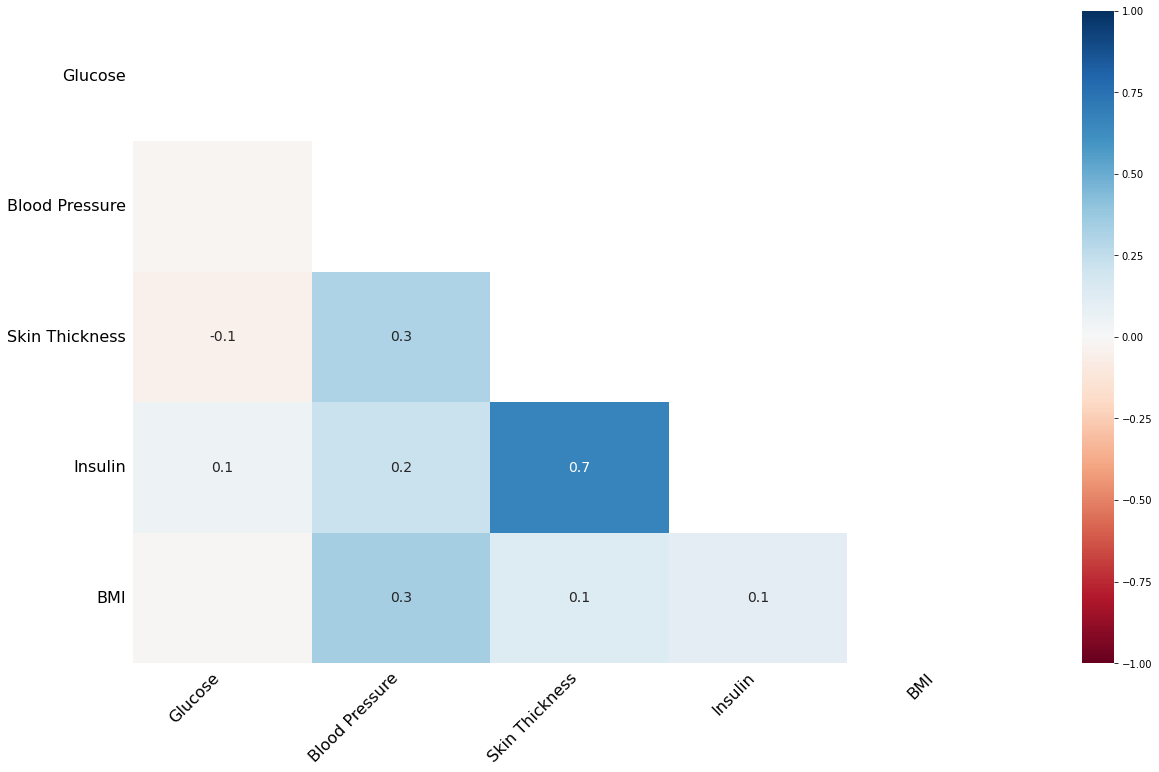

In [21]:
# to see the correlation in between the features w.r.t. null values
# 1 for highly correlative , -1 for least
msno.heatmap(diabetes_data)

- Skin Thickness and Insulin are highly correlated in terms of missing value.  
- Skin Thickness and Glucose are having almost no relation to each other.       
- Insulin and BMI are having almost no relation to each other.

In [22]:
# Percentage of missing value
for columns in diabetes_data:
    print(f"{columns}  :  {round((diabetes_data[columns].isna().sum()/768)*100,2)} % ")

Pregnancies  :  0.0 % 
Glucose  :  0.65 % 
Blood Pressure  :  4.56 % 
Skin Thickness  :  29.56 % 
Insulin  :  48.57 % 
BMI  :  1.43 % 
Diabetes Pedigree Function  :  0.0 % 
Age  :  0.0 % 
Outcome  :  0.0 % 


Glucose and BMI are having missing data nearly 1 %. Hence these rows can be removed.

In [23]:
#print(diabetes_data.shape)
diabetes_data=diabetes_data[diabetes_data['Glucose'].isna() != True] 
#print(diabetes_data.shape)
diabetes_data=diabetes_data[diabetes_data['BMI'].isna() != True]
print(diabetes_data.shape)

(751, 9)


Since Insulin has 48.57 % missing data, so it is advisable to remove the column.

In [24]:
diabetes_data=diabetes_data.drop('Insulin',axis=1)
diabetes_data

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,BMI,Diabetes Pedigree Function,Age,Outcome
0,1.0,85.0,66.0,29.0,26.6,0.351,31.0,Non-Diabetic
1,8.0,183.0,64.0,NaN,23.3,0.672,32.0,Diabetic
2,1.0,89.0,66.0,23.0,28.1,0.167,21.0,Non-Diabetic
3,0.0,137.0,40.0,35.0,43.1,2.288,33.0,Diabetic
4,5.0,116.0,74.0,NaN,25.6,0.201,30.0,Non-Diabetic
...,...,...,...,...,...,...,...,...
762,10.0,101.0,76.0,48.0,32.9,0.171,63.0,Non-Diabetic
763,2.0,122.0,70.0,27.0,36.8,0.340,27.0,Non-Diabetic
764,5.0,121.0,72.0,23.0,26.2,0.245,30.0,Non-Diabetic
765,1.0,126.0,60.0,NaN,30.1,0.349,47.0,Diabetic


In [25]:
diabetes_data.isnull().sum()

Pregnancies                     0
Glucose                         0
Blood Pressure                 28
Skin Thickness                218
BMI                             0
Diabetes Pedigree Function      0
Age                             0
Outcome                         0
dtype: int64

Now we have only two columns with missing data. As there is more missing values so basic imputation will not be ideal.   
So we will look for advance imputation techniques  
We need to split the datasets to avoid data leakage.    
split_x : feature variables of the dataset    
split_y : target variables of the dataset   

In [26]:
split_x=diabetes_data.drop('Outcome',axis=1)
split_y=diabetes_data['Outcome']

In [27]:
split_x.isnull().sum()

Pregnancies                     0
Glucose                         0
Blood Pressure                 28
Skin Thickness                218
BMI                             0
Diabetes Pedigree Function      0
Age                             0
dtype: int64

##### Applying MICE imputation technique to fill null values

In [28]:
# importing module for MICE imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
iter_impute=IterativeImputer(initial_strategy='median') #keeping initial fill value as median

In [29]:
# Making a copy of the dataset 
features_iter=split_x.copy(deep=True)

In [30]:
# null values are filled 
features_iter.loc[:,:]=iter_impute.fit_transform(split_x)

In [31]:
features_iter.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,BMI,Diabetes Pedigree Function,Age
0,1.0,85.0,66.0,29.000000,26.6,0.351,31.0
1,8.0,183.0,64.0,21.472374,23.3,0.672,32.0
2,1.0,89.0,66.0,23.000000,28.1,0.167,21.0
3,0.0,137.0,40.0,35.000000,43.1,2.288,33.0
4,5.0,116.0,74.0,22.070573,25.6,0.201,30.0


In [32]:
# verifying whether null values are filled
features_iter.isnull().sum()

Pregnancies                   0
Glucose                       0
Blood Pressure                0
Skin Thickness                0
BMI                           0
Diabetes Pedigree Function    0
Age                           0
dtype: int64

Clearly seen that there is no null values

In [33]:
# Merging the data
imputed_diabetes_data=pandas.concat([features_iter,split_y],axis=1)

In [34]:
imputed_diabetes_data.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,BMI,Diabetes Pedigree Function,Age,Outcome
0,1.0,85.0,66.0,29.000000,26.6,0.351,31.0,Non-Diabetic
1,8.0,183.0,64.0,21.472374,23.3,0.672,32.0,Diabetic
2,1.0,89.0,66.0,23.000000,28.1,0.167,21.0,Non-Diabetic
3,0.0,137.0,40.0,35.000000,43.1,2.288,33.0,Diabetic
4,5.0,116.0,74.0,22.070573,25.6,0.201,30.0,Non-Diabetic


##### checking for outliers and skewness in features

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

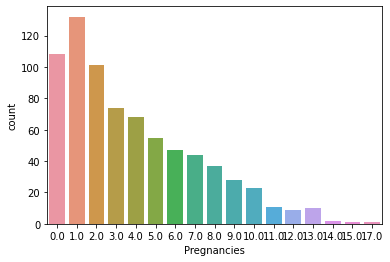

In [35]:
seaborn.countplot(x=imputed_diabetes_data['Pregnancies'])

Most of the data is spread in between 0 and 3.  


<AxesSubplot:xlabel='Pregnancies'>

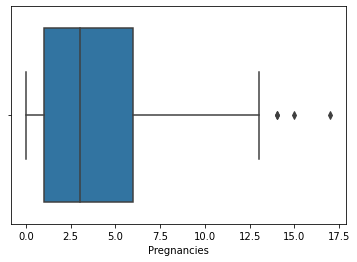

In [36]:
seaborn.boxplot(x=imputed_diabetes_data['Pregnancies'])

In [37]:
# There is outliers on the right side only

q1,q3=numpy.percentile(imputed_diabetes_data['Pregnancies'],[25,75])

iqr = q3 - q1
lower = q1 - 1.5*iqr
higher = q3 + 1.5*iqr

outliers=imputed_diabetes_data['Pregnancies'][imputed_diabetes_data['Pregnancies']>higher]
outliers

87     15.0
158    17.0
297    14.0
454    14.0
Name: Pregnancies, dtype: float64

All these 4 values are not the extreme outliers    
Since replacing this with mean or median can affect our target so removal or replacing is not a good idea

<AxesSubplot:xlabel='Glucose', ylabel='Count'>

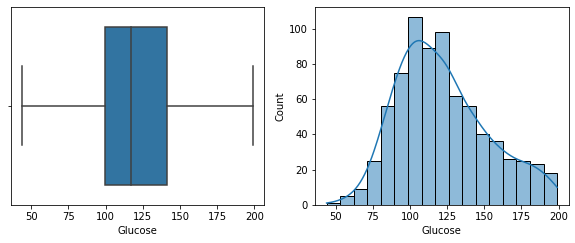

In [38]:
plt.figure(figsize=(10,8))
plt.subplot(221)
seaborn.boxplot(x=imputed_diabetes_data['Glucose'])
plt.subplot(222)
seaborn.histplot(x=imputed_diabetes_data['Glucose'],kde=True)

Glucose is normally distributed and there is no outliers

<AxesSubplot:xlabel='Blood Pressure', ylabel='Count'>

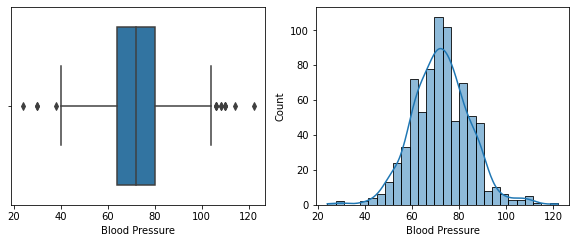

In [39]:
plt.figure(figsize=(10,8))
plt.subplot(221)
seaborn.boxplot(x=imputed_diabetes_data['Blood Pressure'])
plt.subplot(222)
seaborn.histplot(x=imputed_diabetes_data['Blood Pressure'],kde=True)

<AxesSubplot:xlabel='Blood Pressure'>

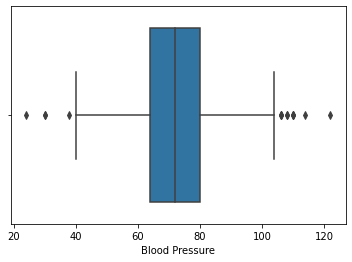

In [40]:
# Matching the above plot with non imputed dataset plot 
seaborn.boxplot(x=diabetes_data['Blood Pressure'])

There is no change in the boxplot of imputed data and the non imputed data so we can say imputation didnot cause outliers.  

In [41]:
q1,q3=numpy.percentile(imputed_diabetes_data['Blood Pressure'],[25,75])

iqr = q3 - q1
lower = q1 - 1.5*iqr
higher = q3 + 1.5*iqr

outliers_right=imputed_diabetes_data['Blood Pressure'][imputed_diabetes_data['Blood Pressure']>higher]
outliers_left=imputed_diabetes_data['Blood Pressure'][imputed_diabetes_data['Blood Pressure']<lower]
print(outliers_left)
print('_____________________________________________________')
print(outliers_right)

17     30.0
124    30.0
596    24.0
598    38.0
Name: Blood Pressure, dtype: float64
_____________________________________________________
42     110.0
83     108.0
105    122.0
176    110.0
361    108.0
548    110.0
657    106.0
661    106.0
671    106.0
690    114.0
Name: Blood Pressure, dtype: float64


For some patients suffering from hypertension can have this range of blood pressure and people who is less active 
and not doing any excercise may have the low blood pressure. So we should not consider this as outlier

<AxesSubplot:xlabel='Skin Thickness', ylabel='Count'>

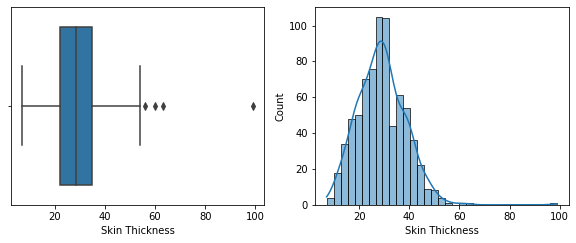

In [42]:
plt.figure(figsize=(10,8))
plt.subplot(221)
seaborn.boxplot(x=imputed_diabetes_data['Skin Thickness'])
plt.subplot(222)
seaborn.histplot(x=imputed_diabetes_data['Skin Thickness'],kde=True)

In [43]:
# There is outliers on the right side only

q1,q3=numpy.percentile(imputed_diabetes_data['Skin Thickness'],[25,75])

iqr = q3 - q1
lower = q1 - 3*iqr
higher = q3 + 3*iqr

outliers=imputed_diabetes_data['Skin Thickness'][imputed_diabetes_data['Skin Thickness']>higher]
outliers

578    99.0
Name: Skin Thickness, dtype: float64

above is an extreme outlier and plot nearly follow normal distribution if outlier removed so we can replace this with z score

In [44]:
# evaluating z score for outlier
x_i = 99
mean=imputed_diabetes_data['Skin Thickness'].mean()
std=imputed_diabetes_data['Skin Thickness'].std()
zscore=(x_i-mean)/std
imputed_diabetes_data['Skin Thickness'] = imputed_diabetes_data['Skin Thickness'].replace({99:mean})

<AxesSubplot:xlabel='Skin Thickness', ylabel='Count'>

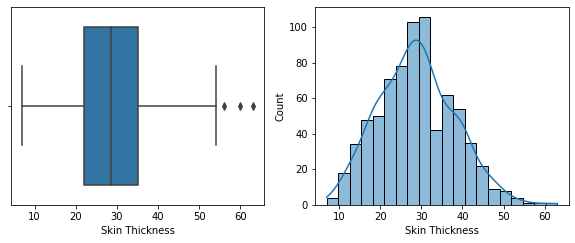

In [45]:
plt.figure(figsize=(10,8))
plt.subplot(221)
seaborn.boxplot(x=imputed_diabetes_data['Skin Thickness'])
plt.subplot(222)
seaborn.histplot(x=imputed_diabetes_data['Skin Thickness'],kde=True)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

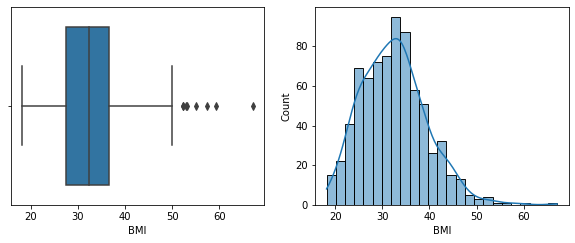

In [46]:
plt.figure(figsize=(10,8))
plt.subplot(221)
seaborn.boxplot(x=imputed_diabetes_data['BMI'])
plt.subplot(222)
seaborn.histplot(x=imputed_diabetes_data['BMI'],kde=True)

In [47]:
q1,q3=numpy.percentile(imputed_diabetes_data['BMI'],[25,75])

iqr = q3 - q1
lower = q1 - 3*iqr
higher = q3 + 3*iqr

outliers=imputed_diabetes_data['BMI'][imputed_diabetes_data['BMI']>higher]
outliers

176    67.1
Name: BMI, dtype: float64

In [48]:
mean=imputed_diabetes_data['BMI'].mean()
imputed_diabetes_data['BMI'] = imputed_diabetes_data['BMI'].replace({67.1:mean})

<AxesSubplot:xlabel='BMI', ylabel='Count'>

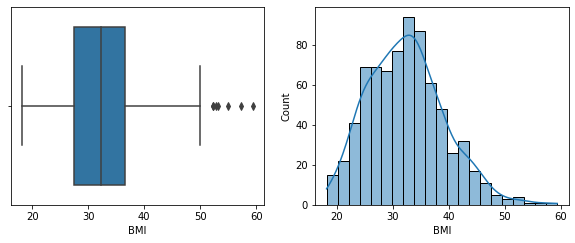

In [49]:
plt.figure(figsize=(10,8))
plt.subplot(221)
seaborn.boxplot(x=imputed_diabetes_data['BMI'])
plt.subplot(222)
seaborn.histplot(x=imputed_diabetes_data['BMI'],kde=True)

<AxesSubplot:xlabel='Diabetes Pedigree Function', ylabel='Count'>

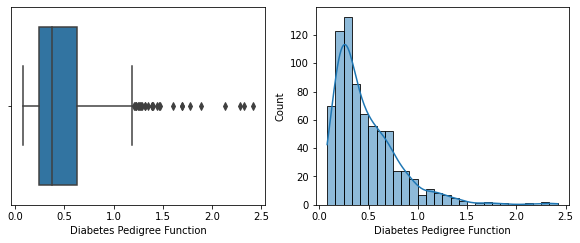

In [50]:
plt.figure(figsize=(10,8))
plt.subplot(221)
seaborn.boxplot(x=imputed_diabetes_data['Diabetes Pedigree Function'])
plt.subplot(222)
seaborn.histplot(x=imputed_diabetes_data['Diabetes Pedigree Function'],kde=True)

In [51]:
q1,q3=numpy.percentile(imputed_diabetes_data['Diabetes Pedigree Function'],[25,75])
q2=numpy.percentile(imputed_diabetes_data['Diabetes Pedigree Function'],25)
iqr = q3 - q1
lower = q1 - 3*iqr
higher = q3 + 3*iqr

outliers=imputed_diabetes_data['Diabetes Pedigree Function'][imputed_diabetes_data['Diabetes Pedigree Function']>higher]
outliers

3      2.288
44     1.893
57     1.781
227    2.329
369    2.137
444    2.420
Name: Diabetes Pedigree Function, dtype: float64

Column pedigree function has good number of outliers and skewness is moderate. so we prefer to go with Square-root transformation.

In [52]:
imputed_diabetes_data['Diabetes Pedigree Function'] = imputed_diabetes_data['Diabetes Pedigree Function']**0.5

In [53]:
#moderate skewness 
imputed_diabetes_data['Diabetes Pedigree Function'].skew()

0.8872491567795466

In [54]:
imputed_diabetes_data['Diabetes Pedigree Function'] = imputed_diabetes_data['Diabetes Pedigree Function']**0.5

In [55]:
imputed_diabetes_data['Diabetes Pedigree Function'].skew()

0.4781305699447567

Skewness is in range now

<AxesSubplot:xlabel='Diabetes Pedigree Function', ylabel='Count'>

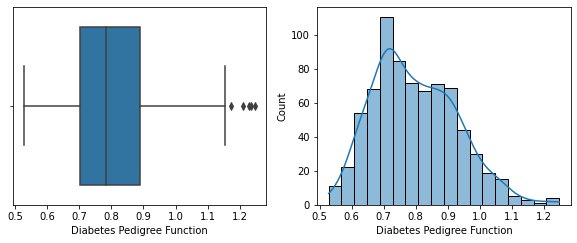

In [56]:
plt.figure(figsize=(10,8))
plt.subplot(221)
seaborn.boxplot(x=imputed_diabetes_data['Diabetes Pedigree Function'])
plt.subplot(222)
seaborn.histplot(x=imputed_diabetes_data['Diabetes Pedigree Function'],kde=True)

<AxesSubplot:xlabel='Age', ylabel='Count'>

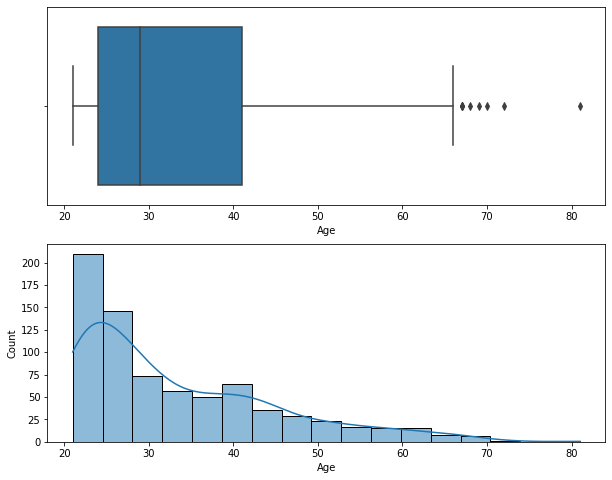

In [57]:
plt.figure(figsize=(10,8))
plt.subplot(211)
seaborn.boxplot(x=imputed_diabetes_data['Age'])
plt.subplot(212)
seaborn.histplot(x=imputed_diabetes_data['Age'],kde=True)

Person having higher Age doesnot mean they are outliers

In [58]:
# defining some function to classify the Age and BMI

def age_classifier(x):
    if x<30 and x>=20:
        return 'Matured'
    elif x<50 and x>=30:
        return 'Middle'
    elif x<70 and x>=50:
        return 'old'
    else :
        return 'Near_to_Death'
    
def bmi_classifier(x):
    if x<=19.5:
        return 'Underweight'
    elif x>19.5 and x<=25 :
        return 'normal weight'
    elif x>25 and x<=45 :
        return 'overweight'
    else  :
        return 'Obese'

In [59]:
# copying the file 
classified_diabetes_data = imputed_diabetes_data.copy(deep=True)

In [60]:
# applying the function
classified_diabetes_data['Age'] = classified_diabetes_data['Age'].map(age_classifier)
classified_diabetes_data['BMI'] = classified_diabetes_data['BMI'].map(bmi_classifier)

In [61]:
# function has been applied
classified_diabetes_data.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,BMI,Diabetes Pedigree Function,Age,Outcome
0,1.0,85.0,66.0,29.000000,overweight,0.769709,Middle,Non-Diabetic
1,8.0,183.0,64.0,21.472374,normal weight,0.905404,Middle,Diabetic
2,1.0,89.0,66.0,23.000000,overweight,0.639262,Matured,Non-Diabetic
3,0.0,137.0,40.0,35.000000,overweight,1.229884,Middle,Diabetic
4,5.0,116.0,74.0,22.070573,overweight,0.669575,Middle,Non-Diabetic


[Text(0.5, 1.0, 'Pregnancies vs Outcome'), Text(0, 0.5, 'Outcome')]

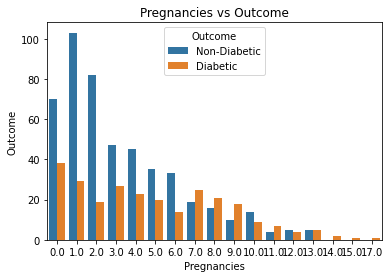

In [62]:
# Bi-Variate analysis

seaborn.countplot(data=classified_diabetes_data,x='Pregnancies',hue='Outcome').set(title='Pregnancies vs Outcome',ylabel='Outcome')

From the above plot it is concluded that with a low number of pregnancies have higher chance to be Non-Diabetic.  
Less than 40% possibilities are there to be diabetic.  
Number greter than 3 will have higher chance to be a diabetic.

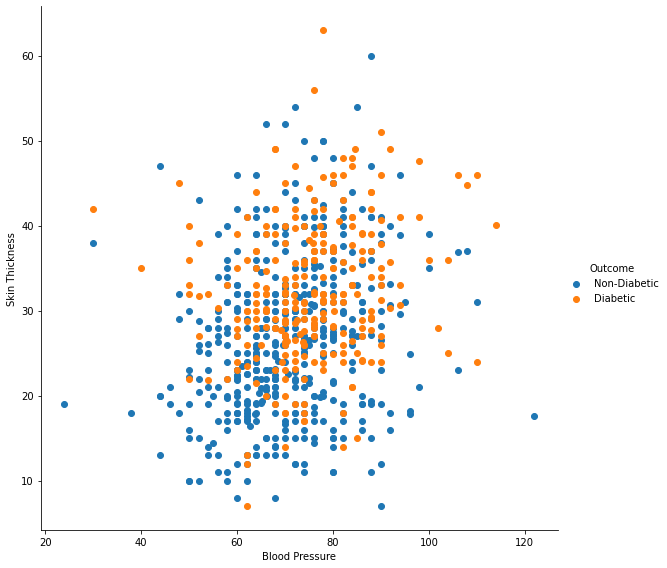

In [63]:
seaborn.FacetGrid(data=classified_diabetes_data,hue='Outcome',height=8).map(plt.scatter,'Blood Pressure','Skin Thickness').add_legend()

[Text(0.5, 1.0, 'Age vs Outcome'), Text(0, 0.5, 'Outcome')]

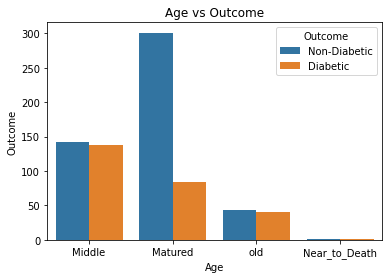

In [64]:
seaborn.countplot(data=classified_diabetes_data,x='Age',hue='Outcome').set(title='Age vs Outcome',ylabel='Outcome')

Young and matured People are not likely to be diabetic. Possibilities are very rare.   
But for other age groups the risks for being diabetic is very high.

[Text(0.5, 1.0, 'Body_mass_index vs Outcome'), Text(0, 0.5, 'Outcome')]

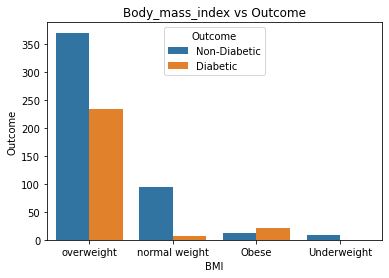

In [65]:
seaborn.countplot(data=classified_diabetes_data,x='BMI',hue='Outcome').set(title='Body_mass_index vs Outcome',ylabel='Outcome')

- Underweight and normal people are surely assumed to be safe from diabetes.  
- Overweight people have comparatively higher chance than normal weight people to be diabetic.  
- Obese are the most likely to have diabetese. 

### Feature Engineering

In [66]:
from sklearn.preprocessing import OrdinalEncoder
encod=OrdinalEncoder()
cod=encod.fit_transform(classified_diabetes_data[['Age']])

In [67]:
classified_diabetes_data

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,BMI,Diabetes Pedigree Function,Age,Outcome
0,1.0,85.0,66.0,29.000000,overweight,0.769709,Middle,Non-Diabetic
1,8.0,183.0,64.0,21.472374,normal weight,0.905404,Middle,Diabetic
2,1.0,89.0,66.0,23.000000,overweight,0.639262,Matured,Non-Diabetic
3,0.0,137.0,40.0,35.000000,overweight,1.229884,Middle,Diabetic
4,5.0,116.0,74.0,22.070573,overweight,0.669575,Middle,Non-Diabetic
...,...,...,...,...,...,...,...,...
762,10.0,101.0,76.0,48.000000,overweight,0.643056,old,Non-Diabetic
763,2.0,122.0,70.0,27.000000,overweight,0.763607,Matured,Non-Diabetic
764,5.0,121.0,72.0,23.000000,overweight,0.703544,Middle,Non-Diabetic
765,1.0,126.0,60.0,27.829628,overweight,0.768611,Middle,Diabetic


In [68]:
imputed_diabetes_data['Outcome'] = imputed_diabetes_data['Outcome'].replace({'Non-Diabetic':0,'Diabetic':1})

In [69]:
imputed_diabetes_data

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,BMI,Diabetes Pedigree Function,Age,Outcome
0,1.0,85.0,66.0,29.000000,26.6,0.769709,31.0,0
1,8.0,183.0,64.0,21.472374,23.3,0.905404,32.0,1
2,1.0,89.0,66.0,23.000000,28.1,0.639262,21.0,0
3,0.0,137.0,40.0,35.000000,43.1,1.229884,33.0,1
4,5.0,116.0,74.0,22.070573,25.6,0.669575,30.0,0
...,...,...,...,...,...,...,...,...
762,10.0,101.0,76.0,48.000000,32.9,0.643056,63.0,0
763,2.0,122.0,70.0,27.000000,36.8,0.763607,27.0,0
764,5.0,121.0,72.0,23.000000,26.2,0.703544,30.0,0
765,1.0,126.0,60.0,27.829628,30.1,0.768611,47.0,1


In [70]:
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
classified_diabetes_data['Outcome'] = label.fit_transform(classified_diabetes_data['Outcome'])
classified_diabetes_data

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,BMI,Diabetes Pedigree Function,Age,Outcome
0,1.0,85.0,66.0,29.000000,overweight,0.769709,Middle,1
1,8.0,183.0,64.0,21.472374,normal weight,0.905404,Middle,0
2,1.0,89.0,66.0,23.000000,overweight,0.639262,Matured,1
3,0.0,137.0,40.0,35.000000,overweight,1.229884,Middle,0
4,5.0,116.0,74.0,22.070573,overweight,0.669575,Middle,1
...,...,...,...,...,...,...,...,...
762,10.0,101.0,76.0,48.000000,overweight,0.643056,old,1
763,2.0,122.0,70.0,27.000000,overweight,0.763607,Matured,1
764,5.0,121.0,72.0,23.000000,overweight,0.703544,Middle,1
765,1.0,126.0,60.0,27.829628,overweight,0.768611,Middle,0


In [71]:
from scipy.stats import spearmanr
coef, p = spearmanr(imputed_diabetes_data['Pregnancies'],imputed_diabetes_data['Outcome'])
print('Spearmans correlation coefficient: %.3f' % coef)
coef, p = spearmanr(imputed_diabetes_data['Glucose'],imputed_diabetes_data['Outcome'])
print('Spearmans correlation coefficient: %.3f' % coef)
coef, p = spearmanr(imputed_diabetes_data['Blood Pressure'],imputed_diabetes_data['Outcome'])
print('Spearmans correlation coefficient: %.3f' % coef)
coef, p = spearmanr(imputed_diabetes_data['Skin Thickness'],imputed_diabetes_data['Outcome'])
print('Spearmans correlation coefficient: %.3f' % coef)
coef, p = spearmanr(imputed_diabetes_data['BMI'],imputed_diabetes_data['Outcome'])
print('Spearmans correlation coefficient: %.3f' % coef)
coef, p = spearmanr(imputed_diabetes_data['Diabetes Pedigree Function'],imputed_diabetes_data['Outcome'])
print('Spearmans correlation coefficient: %.3f' % coef)
coef, p = spearmanr(imputed_diabetes_data['Age'],imputed_diabetes_data['Outcome'])
print('Spearmans correlation coefficient: %.3f' % coef)

Spearmans correlation coefficient: 0.188
Spearmans correlation coefficient: 0.482
Spearmans correlation coefficient: 0.179
Spearmans correlation coefficient: 0.280
Spearmans correlation coefficient: 0.302
Spearmans correlation coefficient: 0.175
Spearmans correlation coefficient: 0.298


In [72]:
final_dataset=imputed_diabetes_data.copy(deep=True)

Glucose , BMI, Age are the comparatively usefull features

In [73]:
final_dataset.drop(['Pregnancies','Age','Blood Pressure',"Skin Thickness",'Diabetes Pedigree Function','Age'],axis=1,inplace=True)

In [74]:
final_dataset

,Glucose,BMI,Outcome
0,85.0,26.6,0
1,183.0,23.3,1
2,89.0,28.1,0
3,137.0,43.1,1
4,116.0,25.6,0
...,...,...,...
762,101.0,32.9,0
763,122.0,36.8,0
764,121.0,26.2,0
765,126.0,30.1,1


In [75]:
#spliting the dataset to create the train-test-split
features_x=final_dataset.drop('Outcome',axis=1)
features_y=final_dataset['Outcome']

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_x, features_y, test_size = 0.15, random_state = 1)

In [77]:
X_train

,Glucose,BMI
327,102.0,45.5
554,124.0,25.5
255,111.0,30.1
36,102.0,32.9
592,82.0,28.5
...,...,...
659,162.0,27.7
731,174.0,44.5
76,95.0,37.7
242,119.0,27.1


In [78]:
X_test

,Glucose,BMI
706,127.0,34.4
616,68.0,20.1
399,95.0,32.0
551,114.0,27.8
95,92.0,31.6
...,...,...
621,183.0,40.8
254,113.0,33.6
755,137.0,32.0
208,184.0,35.5


In [79]:
y_train

327    1
554    0
255    0
36     1
592    0
      ..
659    0
731    1
76     0
242    1
38     1
Name: Outcome, Length: 638, dtype: int64

In [80]:
y_test

706    0
616    0
399    1
551    0
95     0
      ..
621    0
254    1
755    0
208    1
457    1
Name: Outcome, Length: 113, dtype: int64

In [81]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler=MinMaxScaler()
fit_train_x=minmaxscaler.fit_transform(X_train)

# we have to use same scalar that was used for training datset because ML model will be trained with particular scaler
# using fit method will add new scalar
fit_test_x=minmaxscaler.transform(X_test)

In [82]:
fit_train_x

array([[0.37419355, 0.66262136],
       [0.51612903, 0.17718447],
       [0.43225806, 0.28883495],
       ...,
       [0.32903226, 0.47330097],
       [0.48387097, 0.21601942],
       [0.43225806, 0.45873786]])

In [83]:
fit_test_x

array([[0.53548387, 0.39320388],
       [0.15483871, 0.0461165 ],
       [0.32903226, 0.33495146],
       [0.4516129 , 0.23300971],
       [0.30967742, 0.32524272],
       [0.46451613, 0.09466019],
       [0.70967742, 0.30825243],
       [0.23225806, 0.02184466],
       [0.66451613, 0.28398058],
       [0.50967742, 0.33495146],
       [0.32258065, 0.61407767],
       [0.31612903, 0.48058252],
       [0.50322581, 0.40048544],
       [0.50322581, 0.42961165],
       [0.35483871, 0.41747573],
       [0.18709677, 0.20873786],
       [0.54193548, 0.54126214],
       [0.69032258, 0.57281553],
       [0.4516129 , 0.35436893],
       [0.49032258, 0.59951456],
       [0.61935484, 0.50970874],
       [0.62580645, 0.17475728],
       [0.46451613, 0.19660194],
       [0.54193548, 0.44417476],
       [0.49032258, 0.0631068 ],
       [0.50322581, 0.4368932 ],
       [0.38064516, 0.02912621],
       [0.34193548, 0.48300971],
       [0.27096774, 0.29126214],
       [0.35483871, 0.16504854],
       [0.

## Conclusion

- missing value has been removed.
- Effects of outliers has been minimised.
- Age and BMI columns were classified to visualise better.
- From the analysis we found Glucose level, BMI and Age are the most important features to predict the diabetic status.
- We created a final dataset having important features only to process for the machine learning algorithm.

In [84]:
print('_______________________________GOVIND JHA__________________________________________')

_______________________________GOVIND JHA__________________________________________
